In [1]:
# INFORMATION
"""
Repository: https://github.com/NLBrien/mod550-2025
Creation date: 2025-09-23
Author: Nathan L.Brien
Course: MOD550 - Machine Learning
Title: Assignment 1 (task 1), number 1 & 2
Description: Visualize data from a random 2d distribution
    Task 1: make a histogram from a 2d random distribution
    Task 2: make a 2d heat map from a 2d random distribution

Revision date: 2025-09-24 (modified plotting parameters)
Revision date: 2025-09-25 (added export to csv from generated dataframe)
"""

'\nRepository: https://github.com/NLBrien/mod550-2025\nCreation date: 2025-09-23\nAuthor: Nathan L.Brien\nCourse: MOD550 - Machine Learning\nTitle: Assignment 1 (task 1), number 1 & 2\nDescription: Visualize data from a random 2d distribution\n    Task 1: make a histogram from a 2d random distribution\n    Task 2: make a 2d heat map from a 2d random distribution\n\nRevision date: 2025-09-24 (modified plotting parameters)\nRevision date: 2025-09-25 (added export to csv from generated dataframe)\n'

In [2]:
# LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
from Random_distribution_2d import RAND_POINTS_2D

In [3]:
# POINTS GENERATION FUNCTION CALLBACK
"""
See Random_distribution_2d for script details
"""
# Assign a name to the class function
gen_points_2d = RAND_POINTS_2D(
    n_rand_2d=500,
    x_rand_2d_min=0, x_rand_2d_max=100,
    y_rand_2d_min=-50, y_rand_2d_max=50,
)

# Create the list to generate points from sub-function in the class function
list_points_2d = gen_points_2d.RAND_GEN_2D()

# Print the result
print(list_points_2d)

[(19.005201485917823, -45.86296228224527), (33.47874547049064, 34.58119626936421), (88.2998290727772, 28.575718993333965), (47.764836707584216, -3.2542474743829075), (73.56976447901363, -8.303731063840523), (61.87799011268087, -40.050165562785), (54.4023328851195, 4.430232074650931), (90.73507271403376, -9.540744512203815), (88.64045438043665, 41.805163021551735), (70.38169318651497, 48.43257460775217), (85.5567879668465, -19.957263382305214), (54.91879064009915, 36.809701513476654), (3.6506417491801058, -46.276662081995944), (57.19927026827203, -45.239342095339396), (67.65070692723039, 39.30806484246247), (30.78114745379006, 29.115924230324055), (65.49853955587793, -49.682652227087175), (82.37928421806575, -15.560081867646367), (93.87968415003017, -14.050878272806536), (69.43090093298274, 12.553740434064117), (60.2656651155584, -37.77148008733792), (74.49258614209228, 5.0236363892099405), (29.550178480582325, 23.92147822451733), (90.15460697985887, 46.94596606567943), (11.647688821256

In [4]:
# DATA POOL DESCRIPTION
"""
Call the "description" function from Pandas to compute data description such as:
mean, standard, minimum, maximum, quartiles
"""
## Turn points into dataset
T1_dataset_points = pd.DataFrame(list_points_2d, columns=["x", "y"])

## Print dataset description (default preview 5 first rows)
print(T1_dataset_points.describe())

#----------------------------------------------------------------------

# EXPORT
## Export final result to CSV without index
T1_dataset_points.to_csv(
    r"C:\Users\natha\UiS - MOD550\mod550-2025\MOD550-NLB-TASK_1\T1_dataset_points.csv",
    index=False
)

                x           y
count  500.000000  500.000000
mean    52.537446   -1.793539
std     27.993094   28.553792
min      0.205179  -49.842843
25%     29.349374  -25.289062
50%     54.950623   -2.875920
75%     75.356998   21.142840
max     99.908723   49.824698


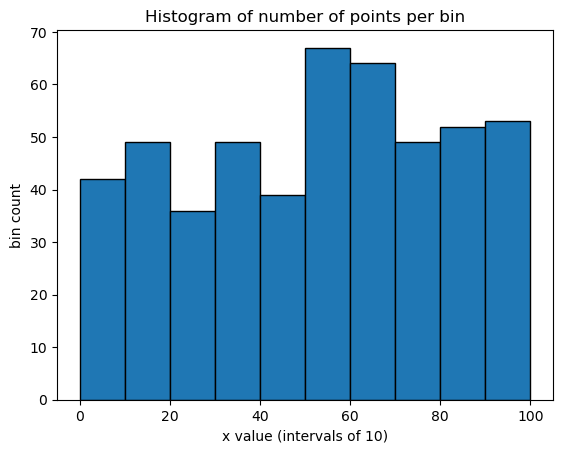

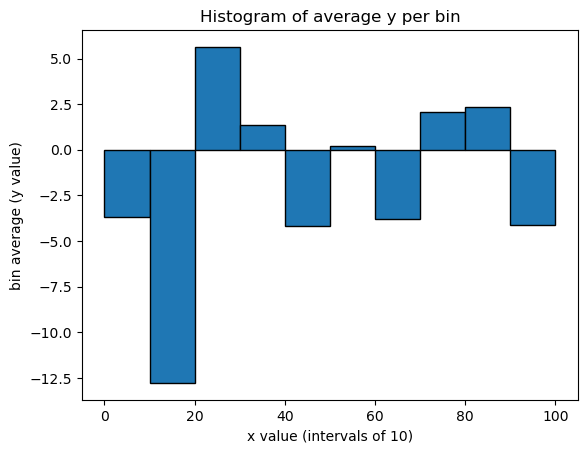

In [5]:
# HISTOGRAM (T1.1)
"""
Define values and functions for histogram plotting
Reference for histogram functions and arguments : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html
"""
# Separate x and y values from the list of tuples (list_points_2d) previously generated
x_vals = [i[0] for i in list_points_2d]
y_vals = [i[1] for i in list_points_2d]

# Create bins for x axis histogram
bins = np.arange(0, 101, 10)  # bin interval of 10

## HISTOGRAM 1
# Plot bar chart of bin counts
plt.hist(x_vals, bins=bins, edgecolor="black")
plt.xlabel("x value (intervals of 10)")
plt.ylabel("bin count")
plt.title("Histogram of number of points per bin")
plt.show()

## HISTOGRAM 2
# Compute the average y axis value for each bin
avg_y, bin_edges, binnumber = binned_statistic(
    x_vals, y_vals, statistic='mean', bins=bins
)

# Define center of each bin for positioning reference on the histogram
"""
use of AI for bin center code debugging
Microsoft Copilot version 1.25091.124.0
"""
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2  # midpoint of each bin

# Plot bar chart of bin averages
plt.bar(bin_centers, avg_y, width=10, edgecolor="black")
plt.xlabel("x value (intervals of 10)")
plt.ylabel("bin average (y value)")
plt.title("Histogram of average y per bin")
plt.show()



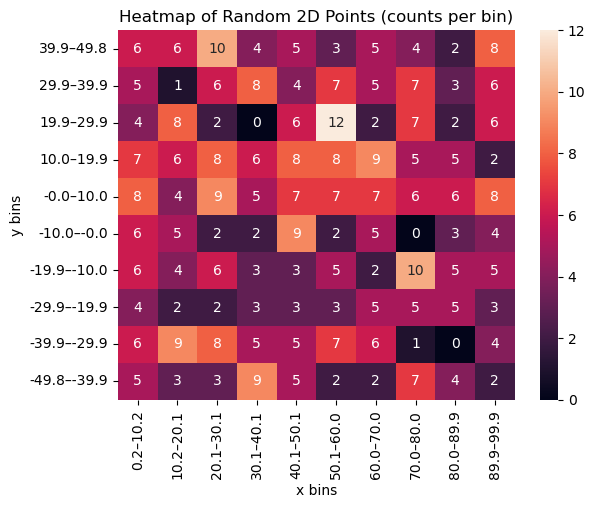

In [6]:
# HEATMAP (T1.2)
"""
Define values and functions for heaetmap plotting
Reference : https://seaborn.pydata.org/generated/seaborn.heatmap.html
"""

# Reuse previously created dataset from: DATA POOL DESCRIPTION
## dataset_points = pd.DataFrame(list_points_2d, columns=["x", "y"])

# Create a 2D count table (number of points in each bin for each variable)
heatmap_data, x_edges, y_edges = np.histogram2d(
    T1_dataset_points["x"],
    T1_dataset_points["y"],
    bins=[10, 10]  # 10 bins for x, 10 bins for y
)

# Transfer dataset to seaborn standard
"""
use of AI for heatmap index and columns debugging
Microsoft Copilot version 1.25091.124.0
"""
heatmap_points = pd.DataFrame(
    heatmap_data,
    index=[f"{round(y_edges[i],1)}–{round(y_edges[i+1],1)}" for i in range(len(y_edges)-1)],
    columns=[f"{round(x_edges[i],1)}–{round(x_edges[i+1],1)}" for i in range(len(x_edges)-1)]
)

# Plotting
ax = sns.heatmap(heatmap_points, annot=True, fmt=".0f")
ax.invert_yaxis() # Make sure lower values are shown at the bottom of the plot
plt.title("Heatmap of Random 2D Points (counts per bin)")
plt.xlabel("x bins")
plt.ylabel("y bins")
plt.show()
